<a href="https://colab.research.google.com/github/ShorouqTelfah/ShorouqTelfah/blob/main/modified_baseline_CNN_training_VinDr_mammo_without_intervention_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/training_split.csv")
val_df   = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/validation_split.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")

# Quick check
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)


(12800, 32)
(3200, 32)
(4000, 32)


In [3]:
train_df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [4]:
print(train_df['preprocessed_path'].head())


0    /content/drive/MyDrive/VinDr_mammo.png/preproc...
1    /content/drive/MyDrive/VinDr_mammo.png/preproc...
2    /content/drive/MyDrive/VinDr_mammo.png/preproc...
3    /content/drive/MyDrive/VinDr_mammo.png/preproc...
4    /content/drive/MyDrive/VinDr_mammo.png/preproc...
Name: preprocessed_path, dtype: object


In [5]:
# Check if files exist
for path in train_df['preprocessed_path'].head():
    exists = os.path.exists(path)
    print(f"{path} -> Exists: {exists}")

/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png -> Exists: True


Path: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png
Size: (224, 224), Mode: L


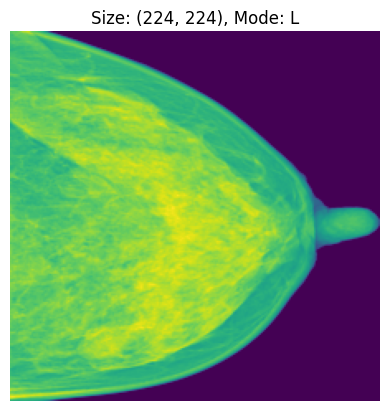

Path: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png
Size: (224, 224), Mode: L


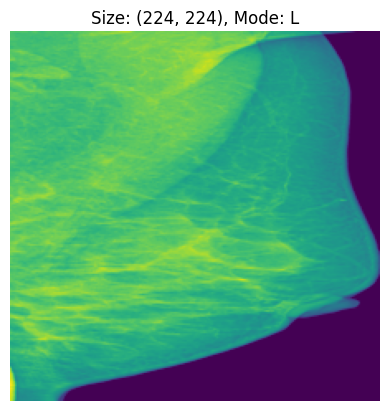

Path: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png
Size: (224, 224), Mode: L


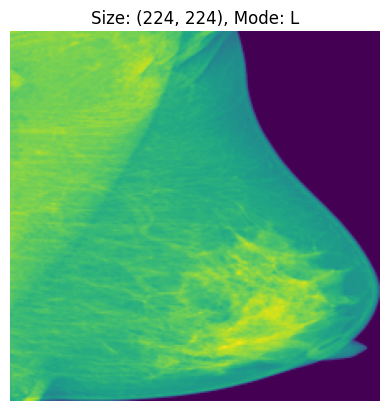

Path: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png
Size: (224, 224), Mode: L


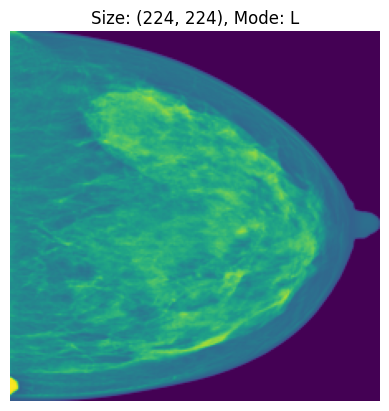

Path: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png
Size: (224, 224), Mode: L


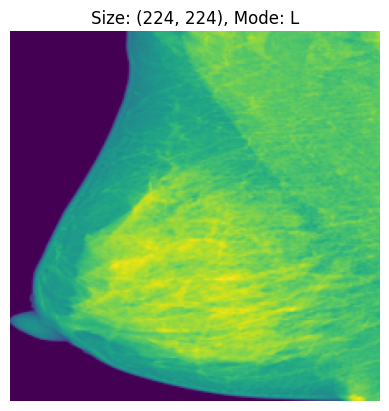

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Loop through a few sample images
for path in train_df['preprocessed_path'].head():
    img = Image.open(path)
    print(f"Path: {path}")
    print(f"Size: {img.size}, Mode: {img.mode}")

    # Show image
    plt.imshow(img)
    plt.title(f"Size: {img.size}, Mode: {img.mode}")
    plt.axis("off")
    plt.show()


In [8]:
for path in train_df['preprocessed_path'].head():
    img = Image.open(path)
    print(path, img.size, img.mode)


/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png (224, 224) L


In [7]:
for path in train_df['preprocessed_path'].head():
    img = Image.open(path).convert('L')
    arr = np.array(img)
    print(path, arr.min(), arr.max())


/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png 0 185
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png 0 206
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png 0 215
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png 0 254
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png 0 185



=== breast_density ===
breast_density
DENSITY A      59
DENSITY B    1210
DENSITY C    9802
DENSITY D    1729
Name: count, dtype: int64

=== breast_birads ===
breast_birads
BI-RADS 1    8589
BI-RADS 2    2997
BI-RADS 3     586
BI-RADS 4     483
BI-RADS 5     145
Name: count, dtype: int64

=== Age Group ===
Age Group
20-29     474
30-39    2397
40-49    6441
50-59    2592
60-69     674
70-79      95
80-89      20
<20       107
Name: count, dtype: int64


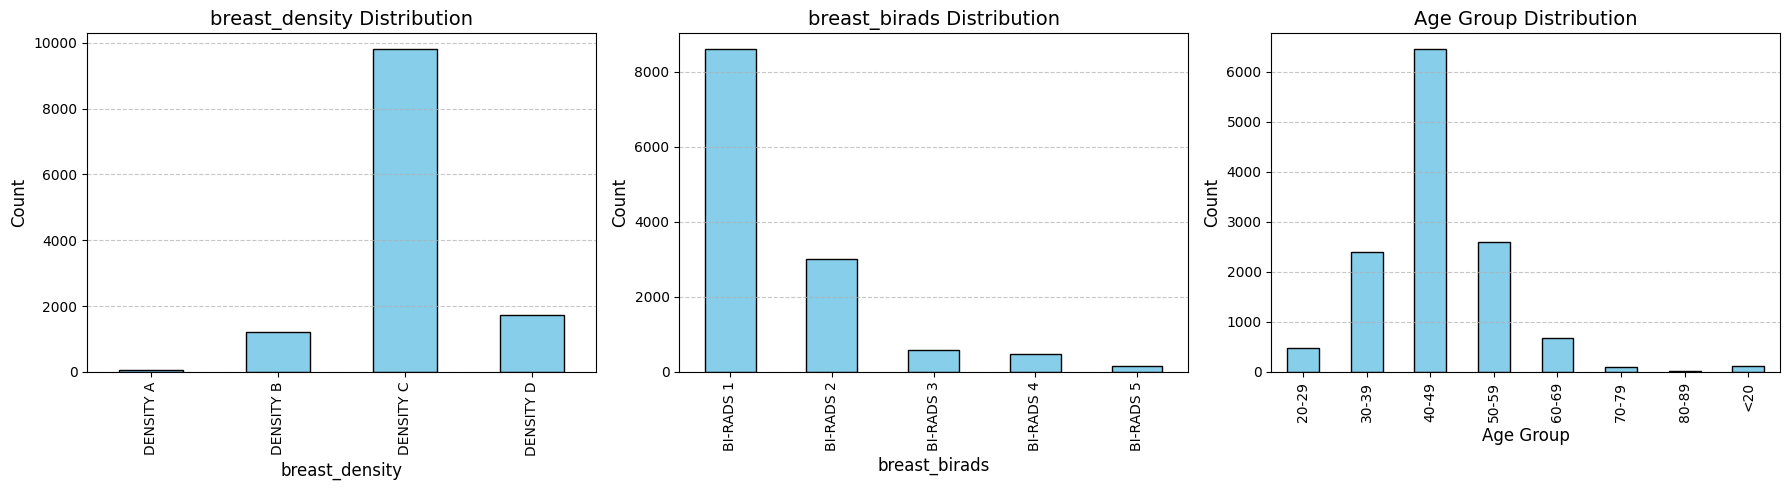

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to visualize
cols_to_plot = ['breast_density', 'breast_birads', 'Age Group']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, cols_to_plot):
    # Count values including NaN as a category
    counts = train_df[col].fillna('NaN').value_counts().sort_index()

    # Print numeric summary
    print(f"\n=== {col} ===")
    print(counts)

    # Plot bar chart
    counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'{col} Distribution', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [7]:
for df, name in zip([val_df, test_df], ["Validation", "Test"]):
    print(f"--- Checking {name} Set ---")
    for path in df['preprocessed_path'].head(5):
        print(path, os.path.exists(path))
    print(df['breast_birads'].value_counts())
    print(df["Patient's Age"].describe())
    print(df['breast_density'].value_counts())
    print("\n")


--- Checking Validation Set ---
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/5f32408ad4dcd0d16200071e61cf5817.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2b0018a6a825025bcd559a3ea4a12b1d.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/60062b50681cfd1009aff92a26475954.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2b217e87073f6ea171ab6d5e2034aae3.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/88b43181e608d1a2218f4ecdf3e19155.png True
breast_birads
BI-RADS 1    2135
BI-RADS 2     745
BI-RADS 3     158
BI-RADS 4     127
BI-RADS 5      35
Name: count, dtype: int64
count    3200.000000
mean       45.112500
std         9.263695
min        14.000000
25%        40.000000
50%        45.000000
75%        50.000000
max        88.000000
Name: Patient's Age, dtype: float64
breast_density
DENSITY C    2430
DENSITY D     431
DENSITY B     318
DENSITY A      

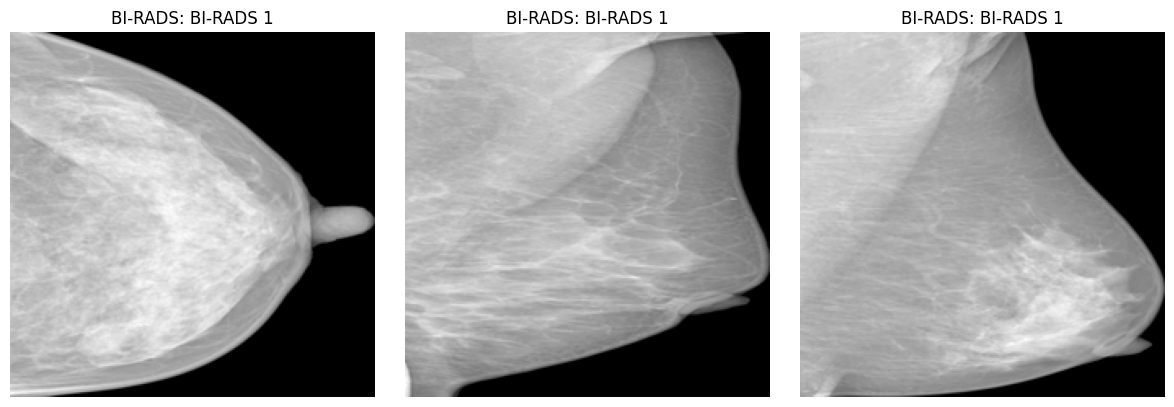

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Select first 3 samples
sample_paths = train_df['preprocessed_path'].head(3)

# Create figure with 1 row, 3 columns
plt.figure(figsize=(12, 4))

for i, path in enumerate(sample_paths):
    img = Image.open(path)
    birads = train_df.loc[train_df['preprocessed_path'] == path, 'breast_birads'].values[0]

    # Add subplot
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"BI-RADS: {birads}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
test_df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [10]:
import torch
torch.cuda.is_available()


False

with saved check point

In [11]:
# 1️⃣ Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
import numpy as np

In [12]:
# 2️⃣ Dataset class with correct label type
class MammoDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes #Converts the BI-RADS column to integer codes (e.g. 0–4).

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')  # grayscale → 3 channels
        label = int(self.labels[idx])  # convert to int
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)  # ensure LongTensor for CrossEntropyLoss

# 3️⃣ Image transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
]) #Converts pixel values from [0, 255] → [0, 1], then normalizes to [-1, 1]


In [13]:
# 4️⃣ Load CSVs
train_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/training_split.csv")
val_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/validation_split.csv")

train_dataset = MammoDataset(train_df, transform=transform)
val_dataset   = MammoDataset(val_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

import torch
import numpy as np
import random

# ✅ Fix random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# ✅ Optional: If using CUDA
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [14]:
import torch
import numpy as np
import random

#✅ Fix random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

#✅ Optional: If using CUDA
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os

# --- 1️⃣ Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# --- 2️⃣ Training setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# --- 3️⃣ Checkpoint setup
checkpoint_folder = "/content/drive/MyDrive/VinDr_mammo.png/modified_checkpoints/"
os.makedirs(checkpoint_folder, exist_ok=True)
best_model_path = os.path.join(checkpoint_folder, "best_model.pth")
last_checkpoint_path = os.path.join(checkpoint_folder, "last_checkpoint.pth")

# --- 4️⃣ Resume variables
start_epoch = 0
best_val_loss = np.inf
patience = 3
epochs_no_improve = 0
num_epochs = 15

# --- Load last checkpoint if exists
if os.path.exists(last_checkpoint_path):
    checkpoint = torch.load(last_checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_val_loss = checkpoint['best_val_loss']
    epochs_no_improve = checkpoint.get('epochs_no_improve', 0)
    print(f"🔄 Resuming from epoch {start_epoch}")

# --- 5️⃣ Training loop
for epoch in range(start_epoch, num_epochs):
    # --- Training
    model.train()
    running_loss = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Batch {i+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)

    # --- Validation
    model.eval()
    val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - "
          f"Val Loss: {avg_val_loss:.4f} - Val Acc: {val_acc:.4f}")

    # --- Check for improvement
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save best model separately
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ New best model saved at epoch {epoch+1}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⚠️ Early stopping triggered at epoch {epoch+1}")
            break

    # --- Save last checkpoint for resuming
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss,
        'epochs_no_improve': epochs_no_improve
    }, last_checkpoint_path)

print("✅ Training complete. Best model saved.")


Epoch 1/15 | Batch 1/400 | Loss: 1.6500
Epoch 1/15 | Batch 11/400 | Loss: 1.5880
Epoch 1/15 | Batch 21/400 | Loss: 1.5300
Epoch 1/15 | Batch 31/400 | Loss: 1.3751
Epoch 1/15 | Batch 41/400 | Loss: 1.2915
Epoch 1/15 | Batch 51/400 | Loss: 1.0016
Epoch 1/15 | Batch 61/400 | Loss: 0.8356
Epoch 1/15 | Batch 71/400 | Loss: 1.0307
Epoch 1/15 | Batch 81/400 | Loss: 0.9249
Epoch 1/15 | Batch 91/400 | Loss: 0.7993
Epoch 1/15 | Batch 101/400 | Loss: 0.9421
Epoch 1/15 | Batch 111/400 | Loss: 0.8597
Epoch 1/15 | Batch 121/400 | Loss: 1.0014
Epoch 1/15 | Batch 131/400 | Loss: 1.0439
Epoch 1/15 | Batch 141/400 | Loss: 0.7831
Epoch 1/15 | Batch 151/400 | Loss: 0.8937
Epoch 1/15 | Batch 161/400 | Loss: 0.9267
Epoch 1/15 | Batch 171/400 | Loss: 1.4541
Epoch 1/15 | Batch 181/400 | Loss: 0.8530
Epoch 1/15 | Batch 191/400 | Loss: 1.2023
Epoch 1/15 | Batch 201/400 | Loss: 0.9612
Epoch 1/15 | Batch 211/400 | Loss: 0.8138
Epoch 1/15 | Batch 221/400 | Loss: 0.8441
Epoch 1/15 | Batch 231/400 | Loss: 1.1302
Epo

dont run

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os

# --- 1️⃣ Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# --- 2️⃣ Training setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# --- 3️⃣ Checkpoint setup
checkpoint_folder = "/content/drive/MyDrive/VinDr_mammo.png/modified_checkpoints/"
os.makedirs(checkpoint_folder, exist_ok=True)
best_model_path = os.path.join(checkpoint_folder, "best_model.pth")

# --- 4️⃣ Resume variables
start_epoch = 0
best_val_loss = np.inf
patience = 3
epochs_no_improve = 0
num_epochs = 15

if os.path.exists(best_model_path):
    print("🔄 Loading previous best model and optimizer state...")
    checkpoint = torch.load(best_model_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_val_loss = checkpoint['best_val_loss']
    print(f"🔄 Resuming from epoch {start_epoch}")

# --- 5️⃣ Training loop
for epoch in range(start_epoch, num_epochs):
    # --- Training
    model.train()
    running_loss = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Batch {i+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)

    # --- Validation
    model.eval()
    val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - "
          f"Val Loss: {avg_val_loss:.4f} - Val Acc: {val_acc:.4f}")

    # --- Save checkpoint
    is_best = avg_val_loss < best_val_loss
    if is_best:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        print(f"✅ New best model at epoch {epoch+1}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⚠️ Early stopping triggered after {epoch+1} epochs.")
            break

    # --- Save model + optimizer state
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, best_model_path)

print("✅ Training complete. Best model saved.")


Epoch 1/15 | Batch 1/400 | Loss: 1.6040


KeyboardInterrupt: 

dont run

In [17]:
# 5️⃣ Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 6️⃣ Training setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# 7️⃣ Checkpoint setup
checkpoint_folder = "/content/drive/MyDrive/VinDr_mammo.png/modified_checkpoints/"
os.makedirs(checkpoint_folder, exist_ok=True)
best_model_path = os.path.join(checkpoint_folder, "best_model.pth")
last_epoch_path = os.path.join(checkpoint_folder, "last_epoch.npy")

# --- Resume variables
start_epoch = 0
best_val_loss = np.inf
if os.path.exists(best_model_path):
    print("🔄 Loading previous best model...")
    model.load_state_dict(torch.load(best_model_path, map_location=device))

    if os.path.exists(last_epoch_path):
        start_epoch = int(np.load(last_epoch_path))
        print(f"🔄 Resuming from epoch {start_epoch+1}")


dont run

In [18]:
# --- Training parameters
num_epochs = 15
patience = 3
epochs_no_improve = 0

# --- Training loop with batch-level progress
for epoch in range(start_epoch, num_epochs):
    # --- Training
    model.train()
    running_loss = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # --- Print batch progress every 10 batches
        if i % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Batch {i+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)

    # --- Validation
    model.eval()
    val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f} - Val Acc: {val_acc:.4f}")

    # --- Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Best model saved: {best_model_path}")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⚠️ Early stopping triggered after {epoch+1} epochs.")
            break

    # --- Save last epoch for resuming
    np.save(last_epoch_path, epoch)

print("✅ Training complete. Best model saved.")


Epoch 1/15 | Batch 1/400 | Loss: 1.5970
Epoch 1/15 | Batch 11/400 | Loss: 1.5314


KeyboardInterrupt: 

Prepare the test dataset

In [21]:
import pandas as pd
test_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")

In [22]:
test_df['breast_birads'].value_counts().sort_index()


,count
breast_birads,
BI-RADS 1,2682
BI-RADS 2,934
BI-RADS 3,186
BI-RADS 4,152
BI-RADS 5,46


In [23]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Test dataset class (same as training)
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes  # if labels exist

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# Transform (same as train/val)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load test CSV
test_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")
test_dataset = MammoTestDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Load your best model

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
best_model_path = "/content/drive/MyDrive/VinDr_mammo.png/modified_checkpoints/best_model.pth"
model.load_state_dict(torch.load(best_model_path))
model.eval()  # Important: set to evaluation mode


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Linear(in_features=128, out_features=5, bias=True)
)

Evaluate on test set

In [25]:
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import numpy as np
import pandas as pd

# --- Ensure model is in evaluation mode
model.eval()

# --- Containers
all_preds = []
all_labels = []

# --- Evaluation loop with progress bar
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# --- Compute metrics
acc = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in range(5)], output_dict=True)
conf_mat = confusion_matrix(all_labels, all_preds)

# --- Display results
print(f"\n✅ Test Accuracy: {acc:.4f}\n")

print("📊 Classification Report:")
print(pd.DataFrame(report).transpose())

print("\n🧩 Confusion Matrix:")
print(pd.DataFrame(conf_mat,
                   index=[f"True {i}" for i in range(5)],
                   columns=[f"Pred {i}" for i in range(5)]))


Evaluating: 100%|██████████| 125/125 [25:32<00:00, 12.26s/batch]


✅ Test Accuracy: 0.6705

📊 Classification Report:
              precision  recall  f1-score    support
Class 0         0.67050  1.0000  0.802754  2682.0000
Class 1         0.00000  0.0000  0.000000   934.0000
Class 2         0.00000  0.0000  0.000000   186.0000
Class 3         0.00000  0.0000  0.000000   152.0000
Class 4         0.00000  0.0000  0.000000    46.0000
accuracy        0.67050  0.6705  0.670500     0.6705
macro avg       0.13410  0.2000  0.160551  4000.0000
weighted avg    0.44957  0.6705  0.538246  4000.0000

🧩 Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0    2682       0       0       0       0
True 1     934       0       0       0       0
True 2     186       0       0       0       0
True 3     152       0       0       0       0
True 4      46       0       0       0       0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


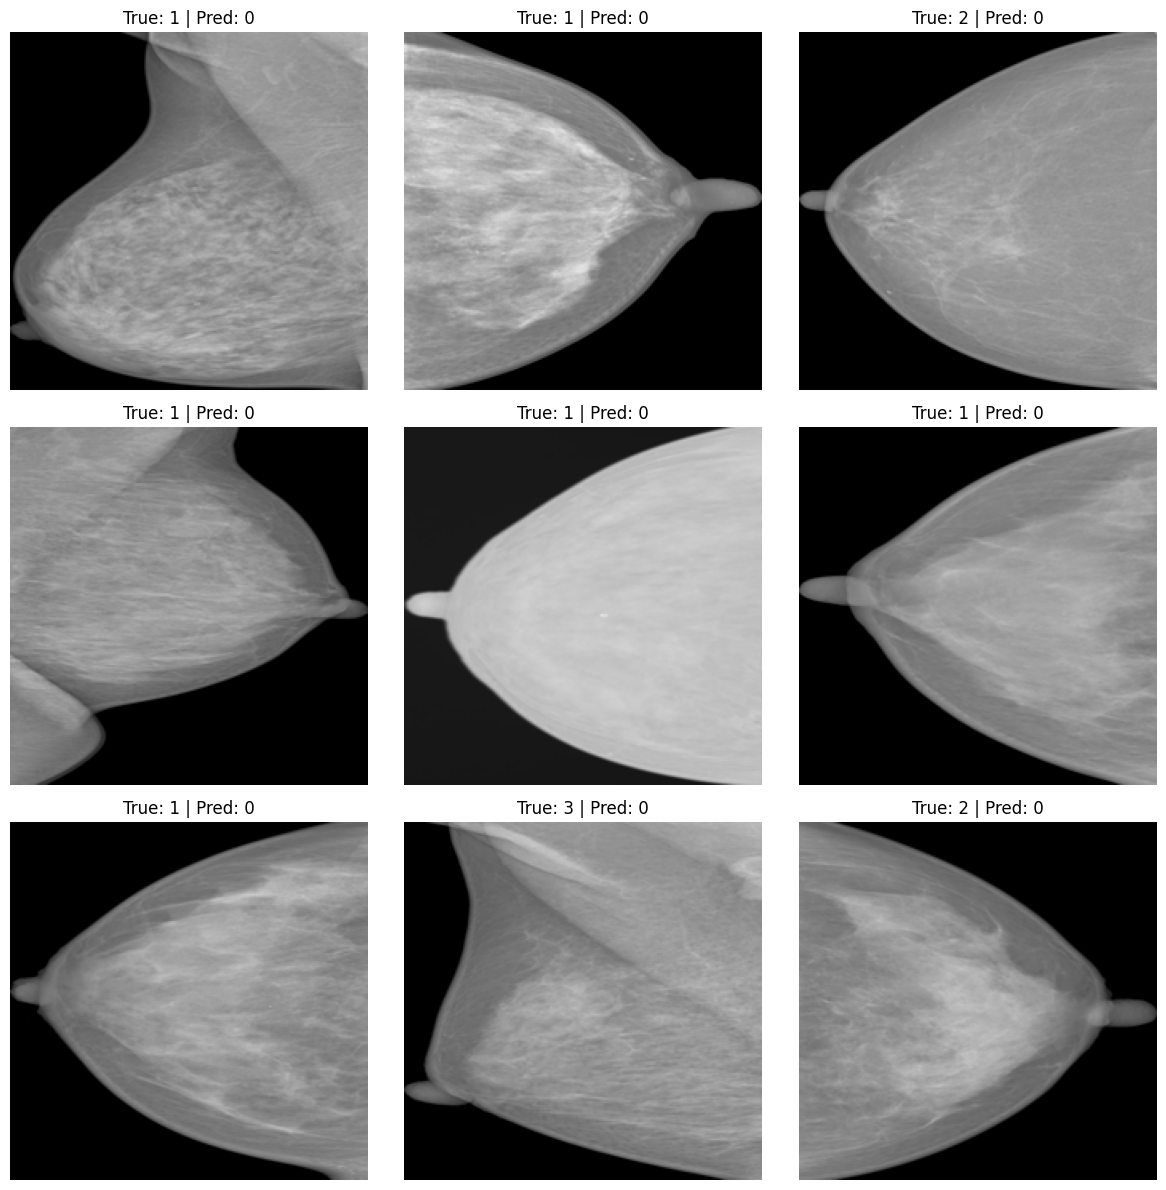

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Number of misclassified images to show
num_samples = 9

# Find indices of misclassified samples
misclassified_idx = np.where(all_preds != all_labels)[0]

# If there are fewer misclassified samples than num_samples
num_samples = min(num_samples, len(misclassified_idx))

# Randomly select misclassified samples
selected_idx = np.random.choice(misclassified_idx, num_samples, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(selected_idx):
    img_path = test_df.loc[idx, 'preprocessed_path']
    img = Image.open(img_path).convert('L').convert('RGB')

    true_label = all_labels[idx]
    pred_label = all_preds[idx]

    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} | Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np

# --- 1️⃣ Save classification report
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("/content/drive/MyDrive/VinDr_mammo.png/modified_test_metrics_generalperformance.csv", index=True)
print("✅ Classification report saved.")

# --- 2️⃣ Save confusion matrix with proper labels
conf_mat_df = pd.DataFrame(
    conf_mat,
    index=[f"True {i}" for i in range(5)],
    columns=[f"Pred {i}" for i in range(5)]
)
conf_mat_df.to_csv("/content/drive/MyDrive/VinDr_mammo.png/modified_confusion_matrix_generalperformance.csv", index=True)
print("✅ Confusion matrix saved.")


✅ Classification report saved.
✅ Confusion matrix saved.


pd.DataFrame(report).transpose().to_csv("/content/drive/MyDrive/VinDr_mammo.png/modified_test_metrics_generalperformance.csv")
np.savetxt("/content/drive/MyDrive/VinDr_mammo.png/modified_confusion_matrix_generalperformance.csv", conf_mat, delimiter=",")


In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from tqdm import tqdm
import torch

# --- Ensure model is in evaluation mode
model.eval()

all_probs = []
all_labels = []

# --- Evaluation loop
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Evaluating Test Set", unit="batch"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        probs = torch.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Convert to arrays
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)
all_preds = all_probs.argmax(axis=1)

# --- Overall metrics
acc = accuracy_score(all_labels, all_preds)
report = classification_report(
    all_labels, all_preds,
    target_names=[f"Class {i}" for i in range(5)],
    output_dict=True
)
conf_mat = confusion_matrix(all_labels, all_preds)

print(f"\n✅ Test Accuracy: {acc:.4f}\n")
print("📊 Classification Report:")
print(pd.DataFrame(report).transpose())
print("\n🧩 Confusion Matrix:")
print(pd.DataFrame(conf_mat,
                   index=[f"True {i}" for i in range(5)],
                   columns=[f"Pred {i}" for i in range(5)]))

# --- One-vs-rest metrics per class: AUC, Sensitivity, Specificity
print("\n📈 One-vs-Rest Metrics per Class:")
num_classes = 5
for i in range(num_classes):
    # Binary labels for current class
    true_binary = (all_labels == i).astype(int)
    pred_prob = all_probs[:, i]

    # AUC
    auc = roc_auc_score(true_binary, pred_prob)

    # Binary predictions using threshold 0.5
    pred_binary = (pred_prob >= 0.5).astype(int)

    # Safe confusion matrix
    cm = confusion_matrix(true_binary, pred_binary, labels=[0,1])
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    print(f"Class {i} → AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")


Evaluating Test Set: 100%|██████████| 125/125 [05:09<00:00,  2.48s/batch]


✅ Test Accuracy: 0.6705

📊 Classification Report:
              precision  recall  f1-score    support
Class 0         0.67050  1.0000  0.802754  2682.0000
Class 1         0.00000  0.0000  0.000000   934.0000
Class 2         0.00000  0.0000  0.000000   186.0000
Class 3         0.00000  0.0000  0.000000   152.0000
Class 4         0.00000  0.0000  0.000000    46.0000
accuracy        0.67050  0.6705  0.670500     0.6705
macro avg       0.13410  0.2000  0.160551  4000.0000
weighted avg    0.44957  0.6705  0.538246  4000.0000

🧩 Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0    2682       0       0       0       0
True 1     934       0       0       0       0
True 2     186       0       0       0       0
True 3     152       0       0       0       0
True 4      46       0       0       0       0

📈 One-vs-Rest Metrics per Class:
Class 0 → AUC: 0.5550, Sensitivity: 0.9985, Specificity: 0.0023
Class 1 → AUC: 0.5437, Sensitivity: 0.0000, Specificity: 1.0000
Class 2


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# --- 1️⃣ Imports
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# --- 2️⃣ Dataset
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes  # if labels exist

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- 3️⃣ Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# --- 4️⃣ Load test CSV
test_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")
test_dataset = MammoTestDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# --- 5️⃣ Load model
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Make sure SimpleCNN class is defined exactly as in training
model = SimpleCNN(num_classes=5).to(device)
best_model_path = "/content/drive/MyDrive/VinDr_mammo.png/modified_checkpoints/best_model.pth"
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()

# 6️⃣ Run evaluation with progress bar


all_probs = []
all_labels = []

# tqdm shows progress as the model processes test batches
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Evaluating Test Set", unit="batch"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        probs = torch.softmax(outputs, dim=1)  # for AUC
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to arrays after loop
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)
all_preds = all_probs.argmax(axis=1)

# --- 7️⃣ Accuracy, classification report, confusion matrix
acc = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in range(5)], output_dict=True)
conf_mat = confusion_matrix(all_labels, all_preds)

print(f"\n✅ Test Accuracy: {acc:.4f}\n")
print("📊 Classification Report:")
print(pd.DataFrame(report).transpose())
print("\n🧩 Confusion Matrix:")
print(pd.DataFrame(conf_mat, index=[f"True {i}" for i in range(5)], columns=[f"Pred {i}" for i in range(5)]))

# --- 8️⃣ Compute AUC, Sensitivity, Specificity (one-vs-rest)
num_classes = 5
print("\n📈 AUC, Sensitivity, Specificity per class:")
for i in range(num_classes):
    true_binary = (all_labels == i).astype(int)
    pred_prob = all_probs[:, i]
    auc = roc_auc_score(true_binary, pred_prob)
    pred_binary = (pred_prob >= 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(true_binary, pred_binary).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"Class {i} → AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

new evaluation per group

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# --- 1️⃣ Dataset class (define once)
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- 2️⃣ Helper: Evaluate a DataLoader and return predictions and labels
def run_inference(model, loader, device):
    all_labels, all_probs, all_preds = [], [], []

    model.eval()
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_labels), np.array(all_probs), np.array(all_preds)

# --- 3️⃣ Helper: Evaluate metrics per subgroup
def evaluate_metrics_by_group(model, df, subgroup_col, transform, device, batch_size=32, num_classes=5):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in tqdm(unique_groups, desc=f"Metrics {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        loader = DataLoader(MammoTestDataset(sub_df, transform), batch_size=batch_size, shuffle=False)
        all_labels, all_probs, all_preds = run_inference(model, loader, device)

        # Overall accuracy
        acc = accuracy_score(all_labels, all_preds)

        # Per-class metrics
        class_metrics = {}
        for i in range(num_classes):
            true_binary = (all_labels == i).astype(int)
            pred_prob = all_probs[:, i]

            try:
                auc = roc_auc_score(true_binary, pred_prob)
            except:
                auc = np.nan

            pred_binary = (pred_prob >= 0.5).astype(int)
            tn, fp, fn, tp = confusion_matrix(true_binary, pred_binary, labels=[0,1]).ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

            class_metrics[f"Class {i}"] = {
                "AUC": round(auc, 4),
                "Sensitivity": round(sensitivity, 4),
                "Specificity": round(specificity, 4)
            }

        results[group] = {"Accuracy": round(acc, 4), "PerClassMetrics": class_metrics}

    return results

# --- 4️⃣ Helper: Compute bias/fairness matrix per subgroup
def bias_matrix_by_group(model, df, subgroup_col, transform, device, batch_size=32, num_classes=5):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in tqdm(unique_groups, desc=f"Bias Matrix {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        loader = DataLoader(MammoTestDataset(sub_df, transform), batch_size=batch_size, shuffle=False)
        _, _, all_preds = run_inference(model, loader, device)
        all_labels = np.array(pd.Categorical(sub_df['breast_birads']).codes)

        # Compute normalized confusion/proportion matrix
        matrix = np.zeros((num_classes, num_classes))
        for true_class in range(num_classes):
            idxs = np.where(all_labels == true_class)[0]
            if len(idxs) > 0:
                counts = np.bincount(all_preds[idxs], minlength=num_classes)
                matrix[true_class] = counts / counts.sum()

        results[group] = pd.DataFrame(matrix,
                                      index=[f"True {i}" for i in range(num_classes)],
                                      columns=[f"Pred {i}" for i in range(num_classes)])
    return results

# --- 5️⃣ Usage examples
# Example: Metrics by Age Group
if 'Age Group' in test_df.columns:
    age_metrics = evaluate_metrics_by_group(model, test_df, 'Age Group', transform, device)
    print("\n✅ Metrics by Age Group:")
    for group, metrics in age_metrics.items():
        print(f"\nAge Group: {group} | Accuracy: {metrics['Accuracy']}")
        for cls, cls_metrics in metrics['PerClassMetrics'].items():
            print(f"  {cls}: AUC={cls_metrics['AUC']}, Sensitivity={cls_metrics['Sensitivity']}, Specificity={cls_metrics['Specificity']}")

# Example: Bias/Fairness by Breast Density
if 'breast_density' in test_df.columns:
    density_bias = bias_matrix_by_group(model, test_df, 'breast_density', transform, device)
    print("\n✅ Bias / Fairness Matrix by Breast Density:")
    for density, df_matrix in density_bias.items():
        print(f"\nDensity: {density}")
        display(df_matrix)


Metrics Age Group:  57%|█████▋    | 4/7 [04:55<03:30, 70.02s/it] /usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
Metrics Age Group:  86%|████████▌ | 6/7 [05:10<00:33, 33.46s/it]/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning


✅ Metrics by Age Group:

Age Group: 50-59 | Accuracy: 0.6709
  Class 0: AUC=0.6086, Sensitivity=1.0, Specificity=0.0078
  Class 1: AUC=0.6044, Sensitivity=0.0, Specificity=1.0
  Class 2: AUC=0.4463, Sensitivity=0.0, Specificity=1.0
  Class 3: AUC=0.6715, Sensitivity=0.0, Specificity=1.0
  Class 4: AUC=0.6042, Sensitivity=0.0, Specificity=1.0

Age Group: 30-39 | Accuracy: 0.6912
  Class 0: AUC=0.53, Sensitivity=1.0, Specificity=0.004
  Class 1: AUC=0.5289, Sensitivity=0.0, Specificity=1.0
  Class 2: AUC=0.5262, Sensitivity=0.0, Specificity=1.0
  Class 3: AUC=0.6, Sensitivity=0.0, Specificity=1.0
  Class 4: AUC=0.7543, Sensitivity=0.0, Specificity=1.0

Age Group: 40-49 | Accuracy: 0.6778
  Class 0: AUC=0.5439, Sensitivity=0.997, Specificity=0.0
  Class 1: AUC=0.5375, Sensitivity=0.0, Specificity=1.0
  Class 2: AUC=0.5503, Sensitivity=0.0, Specificity=1.0
  Class 3: AUC=0.5196, Sensitivity=0.0, Specificity=1.0
  Class 4: AUC=0.9186, Sensitivity=0.0, Specificity=1.0

Age Group: 60-69 | Ac

Bias Matrix breast_density: 100%|██████████| 4/4 [05:10<00:00, 77.56s/it]


✅ Bias / Fairness Matrix by Breast Density:

Density: DENSITY B


,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4
True 0,1.0,0.0,0.0,0.0,0.0
True 1,1.0,0.0,0.0,0.0,0.0
True 2,1.0,0.0,0.0,0.0,0.0
True 3,1.0,0.0,0.0,0.0,0.0
True 4,1.0,0.0,0.0,0.0,0.0



Density: DENSITY C


,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4
True 0,1.0,0.0,0.0,0.0,0.0
True 1,1.0,0.0,0.0,0.0,0.0
True 2,1.0,0.0,0.0,0.0,0.0
True 3,1.0,0.0,0.0,0.0,0.0
True 4,1.0,0.0,0.0,0.0,0.0



Density: DENSITY D


,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4
True 0,1.0,0.0,0.0,0.0,0.0
True 1,1.0,0.0,0.0,0.0,0.0
True 2,1.0,0.0,0.0,0.0,0.0
True 3,1.0,0.0,0.0,0.0,0.0
True 4,1.0,0.0,0.0,0.0,0.0



Density: DENSITY A


,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4
True 0,1.0,0.0,0.0,0.0,0.0
True 1,0.0,0.0,0.0,0.0,0.0
True 2,0.0,0.0,0.0,0.0,0.0
True 3,0.0,0.0,0.0,0.0,0.0
True 4,0.0,0.0,0.0,0.0,0.0


In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import torch
import numpy as np
from PIL import Image
import pandas as pd

# --- Dataset class
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- Function to compute metrics per subgroup
def evaluate_metrics_by_group(model, df, subgroup_col, transform, batch_size=32, num_classes=5):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in tqdm(unique_groups, desc=f"Evaluating {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_labels, all_probs = [], []

        model.eval()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                probs = torch.softmax(outputs, dim=1)
                all_probs.extend(probs.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        all_labels = np.array(all_labels)
        all_probs = np.array(all_probs)
        all_preds = all_probs.argmax(axis=1)
        acc = accuracy_score(all_labels, all_preds)

        # Compute AUC, sensitivity, specificity per class
        class_metrics = {}
        for i in range(num_classes):
            true_binary = (all_labels == i).astype(int)
            pred_prob = all_probs[:, i]

            try:
                auc = roc_auc_score(true_binary, pred_prob)
            except:
                auc = np.nan  # if only one class present

            pred_binary = (pred_prob >= 0.5).astype(int)
            tn, fp, fn, tp = confusion_matrix(true_binary, pred_binary, labels=[0,1]).ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

            class_metrics[f"Class {i}"] = {
                "AUC": round(auc, 4),
                "Sensitivity": round(sensitivity, 4),
                "Specificity": round(specificity, 4)
            }

        results[group] = {
            "Accuracy": round(acc, 4),
            "PerClassMetrics": class_metrics
        }

    return results

# --- Evaluate by Age Group
if 'Age Group' in test_df.columns:
    age_metrics = evaluate_metrics_by_group(model, test_df, 'Age Group', transform)
    print("\n✅ Metrics by Age Group:")
    for group, metrics in age_metrics.items():
        print(f"\nAge Group: {group} | Accuracy: {metrics['Accuracy']}")
        for cls, cls_metrics in metrics['PerClassMetrics'].items():
            print(f"  {cls}: AUC={cls_metrics['AUC']}, Sensitivity={cls_metrics['Sensitivity']}, Specificity={cls_metrics['Specificity']}")

# --- Evaluate by Breast Density
if 'breast_density' in test_df.columns:
    density_metrics = evaluate_metrics_by_group(model, test_df, 'breast_density', transform)
    print("\n✅ Metrics by Breast Density:")
    for density, metrics in density_metrics.items():
        print(f"\nDensity: {density} | Accuracy: {metrics['Accuracy']}")
        for cls, cls_metrics in metrics['PerClassMetrics'].items():
            print(f"  {cls}: AUC={cls_metrics['AUC']}, Sensitivity={cls_metrics['Sensitivity']}, Specificity={cls_metrics['Specificity']}")


bias and fairness by group

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from PIL import Image
import numpy as np

# --- Dataset class
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- Function to compute bias/fairness matrix
def bias_matrix_by_group(model, df, subgroup_col, transform, batch_size=32, num_classes=5):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in tqdm(unique_groups, desc=f"Bias Matrix {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_preds, all_labels = [], []
        model.eval()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        all_labels = np.array(all_labels)
        all_preds = np.array(all_preds)

        # Compute proportion matrix: rows = true class, columns = predicted class
        matrix = np.zeros((num_classes, num_classes))
        for true_class in range(num_classes):
            idxs = np.where(all_labels == true_class)[0]
            if len(idxs) > 0:
                counts = np.bincount(all_preds[idxs], minlength=num_classes)
                matrix[true_class] = counts / counts.sum()  # normalize per true class
        results[group] = pd.DataFrame(matrix,
                                      index=[f"True {i}" for i in range(num_classes)],
                                      columns=[f"Pred {i}" for i in range(num_classes)])
    return results

# --- Bias / Fairness per Age Group
if 'Age Group' in test_df.columns:
    age_bias = bias_matrix_by_group(model, test_df, 'Age Group', transform)
    print("\n✅ Bias / Fairness Matrix by Age Group:")
    for group, df_matrix in age_bias.items():
        print(f"\nAge Group: {group}")
        display(df_matrix)

# --- Bias / Fairness per Density
if 'breast_density' in test_df.columns:
    density_bias = bias_matrix_by_group(model, test_df, 'breast_density', transform)
    print("\n✅ Bias / Fairness Matrix by Breast Density:")
    for density, df_matrix in density_bias.items():
        print(f"\nDensity: {density}")
        display(df_matrix)


nwe metrex by group

In [ ]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
from tqdm import tqdm

# --- Device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Dataset class
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- Function to compute per-class fairness
def compute_fairness_per_class(model, df, subgroup_col, transform, num_classes=5, batch_size=32):
    model.eval()
    groups = df[subgroup_col].dropna().unique()
    results = {}

    # Collect predictions and labels per group
    preds_per_group = {}
    labels_per_group = {}

    for group in tqdm(groups, desc=f"Evaluating fairness by {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        if len(all_preds) == 0:
            continue

        preds_per_group[group] = np.array(all_preds)
        labels_per_group[group] = np.array(all_labels)

    # --- Compute fairness metrics per class
    for cls in range(num_classes):
        pos_rates, tpr_rates = [], []

        for g in preds_per_group.keys():
            preds = preds_per_group[g]
            labels = labels_per_group[g]

            # Demographic Parity: positive prediction rate
            pos_rate = (preds == cls).mean()
            pos_rates.append(pos_rate)

            # Equal Opportunity: true positive rate
            true_positives = ((preds == cls) & (labels == cls)).sum()
            actual_positives = (labels == cls).sum()
            tpr = true_positives / actual_positives if actual_positives > 0 else np.nan
            tpr_rates.append(tpr)

        dpd = np.nanmax(pos_rates) - np.nanmin(pos_rates)
        eod = np.nanmax(tpr_rates) - np.nanmin(tpr_rates)
        dir_ratio = np.nanmin(pos_rates) / np.nanmax(pos_rates) if np.nanmax(pos_rates) > 0 else np.nan

        results[f"Class {cls}"] = {
            "DPD": round(dpd, 4),
            "EOD": round(eod, 4),
            "DIR": round(dir_ratio, 4)
        }

    return results

# --- Evaluate fairness per age group
if 'Age Group' in test_df.columns:
    age_fairness_per_class = compute_fairness_per_class(model, test_df, 'Age Group', transform)
    print("\n=== Age-based Fairness per Class ===")
    for cls, metrics in age_fairness_per_class.items():
        print(f"{cls}: DPD={metrics['DPD']}, EOD={metrics['EOD']}, DIR={metrics['DIR']}")

# --- Evaluate fairness per breast density
if 'breast_density' in test_df.columns:
    density_fairness_per_class = compute_fairness_per_class(model, test_df, 'breast_density', transform)
    print("\n=== Density-based Fairness per Class ===")
    for cls, metrics in density_fairness_per_class.items():
        print(f"{cls}: DPD={metrics['DPD']}, EOD={metrics['EOD']}, DIR={metrics['DIR']}")


grad_cam per group

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# --- Dataset class
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# --- Grad-CAM class
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, x, class_idx=None):
        self.model.zero_grad()
        output = self.model(x)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        loss = output[:, class_idx]
        loss.backward(retain_graph=True)
        weights = self.gradients.mean(dim=(2,3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = F.interpolate(cam, size=x.shape[2:], mode='bilinear', align_corners=False)
        cam = cam.squeeze().cpu().numpy()
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
        return cam

# --- Visualization function
def show_gradcam(img_tensor, cam, true_label=None, pred_label=None):
    img_np = img_tensor.permute(1,2,0).cpu().numpy()
    img_np = (img_np * 0.5) + 0.5
    img_np = np.clip(img_np, 0, 1)

    plt.figure(figsize=(5,5))
    plt.imshow(img_np)
    plt.imshow(cam, cmap='jet', alpha=0.4)
    title = ""
    if true_label is not None:
        title += f"True: {true_label} "
    if pred_label is not None:
        title += f"Pred: {pred_label}"
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Helper to get last conv layer
def get_last_conv_layer(model):
    conv_layers = [m for m in model.modules() if isinstance(m, torch.nn.Conv2d)]
    if len(conv_layers) == 0:
        raise ValueError("No Conv2d layers found in the model")
    return conv_layers[-1]

# --- Function to generate Grad-CAM per subgroup
def gradcam_per_subgroup(model, df, subgroup_col, transform, device, samples_per_group=3):
    model.eval()
    unique_groups = df[subgroup_col].dropna().unique()
    target_layer = get_last_conv_layer(model)
    gradcam_generator = GradCAM(model, target_layer)

    for group in unique_groups:
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue
        print(f"\n--- Grad-CAM for {subgroup_col} = {group} ---")
        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=1, shuffle=True)

        for i, (img, label) in enumerate(loader):
            if i >= samples_per_group:
                break
            img = img.to(device)
            pred = model(img).argmax(dim=1).item()
            cam = gradcam_generator(img, class_idx=pred)
            show_gradcam(img[0], cam, true_label=label.item(), pred_label=pred)

# --- Example usage ---
# gradcam_per_subgroup(model, test_df, 'Age Group', transform, device)
# gradcam_per_subgroup(model, test_df, 'breast_density', transform, device)
